# 📘 Linear Regression from Scratch using Gradient Descent

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1lH5eiKZYLUt6M0fTZDItokR7KdYii2mT?usp=sharing)

This notebook demonstrates a custom implementation of Linear Regression using **manual Gradient Descent**, trained on the California Housing dataset.

## ✅ Key Features
- Feature normalization using `StandardScaler`
- Manual parameter updates using gradient descent
- Evaluation metrics: RMSE, MAE, R²
- Loss visualization and prediction accuracy plots


# Linear Regression Model

In this notebook, we will build a simple Linear Regression model **from scratch using NumPy**.  
We'll generate a synthetic dataset, compute model parameters using the **Normal Equation**, make predictions, and visualize the results.


---



In [1]:
# 📌 Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


## 📌 Step 2: Generate a synthetic linear dataset

We create `X` values randomly between 0 and 2 and compute `y` using a true linear relation `y = 4 + 3x + noise`.  
This simulates a real-world scenario with some measurement noise.


In [2]:
np.random.seed(42)  # For reproducibility

X = 2 * np.random.rand(100, 1)               # 100 random X values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)      # True relation with Gaussian noise


## 📌 Step 3: Add the bias term to feature matrix

To model `y = b0 + b1*x`, we add a column of ones to `X`.  
This allows us to learn the intercept (`b0`) as part of matrix operations.


In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance


## 📌 Step 4: Compute model parameters using the Normal Equation

We solve the equation:

θ=(X
T
 X)
−1
 X
T
 y

This gives us the best-fit values for intercept and slope.


In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("📌 Learned parameters [intercept, slope]:")
print(theta_best.ravel())


📌 Learned parameters [intercept, slope]:
[4.21509616 2.77011339]


## 📌 Step 5: Use the model to make predictions

We will predict `y` values for new `x = 0` and `x = 2` using the learned parameters.


In [5]:
X_new = np.array([[0], [2]])                       # new X values
X_new_b = np.c_[np.ones((2, 1)), X_new]            # add bias term
y_predict = X_new_b.dot(theta_best)                # prediction

print("📌 Predicted y values for x = 0 and x = 2:")
print(y_predict.ravel())


📌 Predicted y values for x = 0 and x = 2:
[4.21509616 9.75532293]


## 📌 Step 6: Visualize the regression line

We now plot:
- The original data points (scatter plot)
- The best-fit regression line (red line)

This helps us see how well our model fits the data.


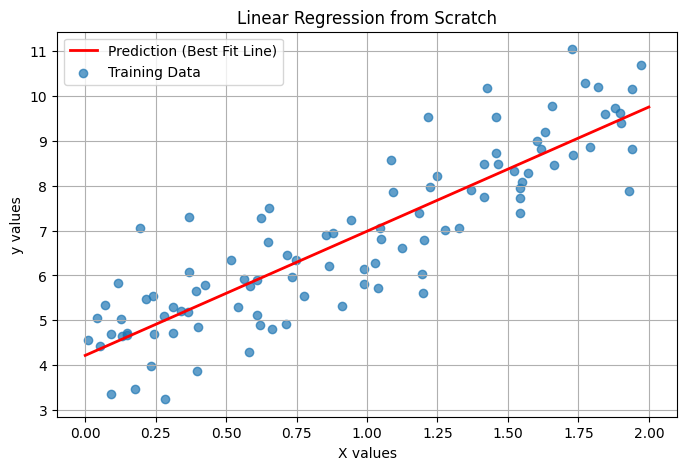

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prediction (Best Fit Line)")
plt.scatter(X, y, alpha=0.7, label="Training Data")
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Linear Regression from Scratch")
plt.legend()
plt.grid(True)
plt.show()


# Linear Regression with Gradient Descent + Error Metrics

In this notebook, we manually implement **Linear Regression using Gradient Descent** instead of the Normal Equation.  
This method is more scalable for large datasets and helps build intuition about how models learn.  
We also compute evaluation metrics:  
- RMSE (Root Mean Squared Error)  
- MAE (Mean Absolute Error)  
- R² Score (Coefficient of Determination)


In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


## 📌  Add Bias Term
We add a column of ones to `X` to learn the intercept.


In [10]:
X_b = np.c_[np.ones((100, 1)), X]  # Add bias (x0 = 1)


## 📌 Step 4: Implement Gradient Descent

We initialize parameters and iteratively update them using the gradient of the cost function.

Update rule:
\[
\theta = \theta - \alpha \cdot \frac{1}{m} X^T (X\theta - y)
\]


In [11]:
# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)

# Initialize theta (2 parameters: intercept and slope)
theta = np.random.randn(2, 1)

# Gradient Descent Loop
for iteration in range(n_iterations):
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

print("📌 Learned parameters [intercept, slope]:")
print(theta.ravel())


📌 Learned parameters [intercept, slope]:
[4.21509616 2.77011339]


## 📌 Step 5: Make Predictions and Plot

We now use the learned parameters to predict and plot the best-fit line.


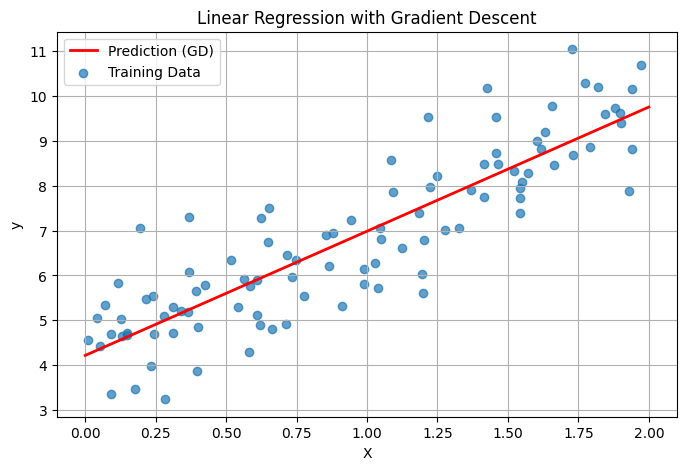

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prediction (GD)")
plt.scatter(X, y, alpha=0.7, label="Training Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


## 📌 Step 7: Compute RMSE (Root Mean Squared Error)

RMSE is a commonly used metric to evaluate the performance of regression models.

It calculates the square root of the average of the squared differences between actual and predicted values:


$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}
$$


- A lower RMSE indicates better model performance.
- It penalizes larger errors more heavily due to the squaring operation.
- Units of RMSE are the same as the target variable.

We will now compute RMSE for our model’s predictions.


In [13]:
y_pred_all = X_b.dot(theta)

rmse = np.sqrt(np.mean((y - y_pred_all) ** 2))
print(f"📉 RMSE: {rmse:.4f}")


📉 RMSE: 0.8981


## 📌 Step 7: Compute MAE (Mean Absolute Error)



$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$



MAE is robust to outliers and gives a sense of average error.


In [14]:
mae = np.mean(np.abs(y - y_pred_all))
print(f"📉 MAE: {mae:.4f}")


📉 MAE: 0.7010


## 📌 Step 8: Compute R² Score (Coefficient of Determination)



$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$




It tells how much variance in `y` is explained by the model.


In [15]:
ss_res = np.sum((y - y_pred_all) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"📈 R² Score: {r2:.4f}")


📈 R² Score: 0.7693


## 📌 testing the custom Linear Regression model on the California Housing dataset

We will apply our manually implemented Gradient Descent-based Linear Regression model to the California Housing dataset and evaluate its performance using RMSE, MAE, and R² Score.


In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target.reshape(-1, 1)  # Reshape for consistency

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias (intercept) term manually
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Shape: (n_samples, n_features + 1)


In [20]:
# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
m = X_b.shape[0]

theta = np.random.randn(X_b.shape[1], 1)
loss_history = []

# Gradient Descent with loss tracking
for iteration in range(n_iterations):
    y_pred = X_b.dot(theta)
    loss = np.mean((y - y_pred) ** 2)  # MSE
    loss_history.append(loss)

    gradients = (2 / m) * X_b.T.dot(y_pred - y)
    theta = theta - learning_rate * gradients


In [21]:
# Make predictions
y_pred = X_b.dot(theta)

# RMSE
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

# MAE
mae = np.mean(np.abs(y - y_pred))

# R² Score
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"📉 RMSE: {rmse:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📈 R² Score: {r2:.4f}")


📉 RMSE: 0.7241
📉 MAE: 0.5312
📈 R² Score: 0.6062


## 📌 Step 4: Visualize Training Loss Over Epochs

To monitor how our gradient descent optimizer performs, we plot the **Mean Squared Error (MSE)** after each iteration. A decreasing curve indicates successful convergence.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


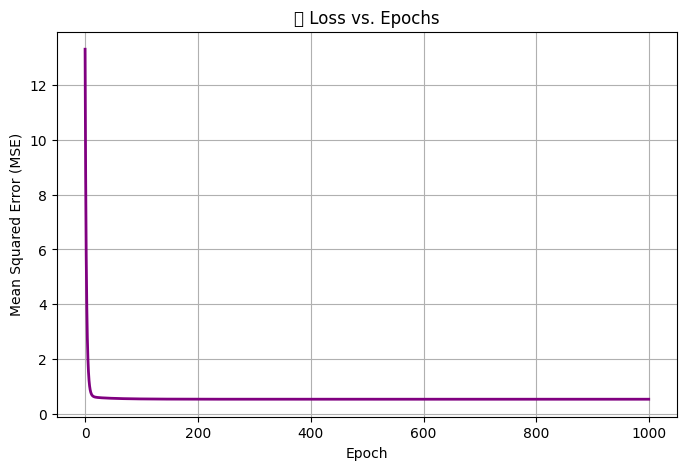

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(loss_history, color="purple", linewidth=2)
plt.title("📉 Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


## 📌  Train-Test Split and Prediction Plot

We split the dataset into training and test sets, fit the model on the training data, and compare predicted vs. actual values on the test set.


In [23]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


In [24]:
# Reinitialize
theta = np.random.randn(X_train_b.shape[1], 1)
loss_history = []
m_train = X_train_b.shape[0]

# Gradient Descent
for iteration in range(n_iterations):
    y_train_pred = X_train_b.dot(theta)
    loss = np.mean((y_train - y_train_pred) ** 2)
    loss_history.append(loss)

    gradients = (2 / m_train) * X_train_b.T.dot(y_train_pred - y_train)
    theta = theta - learning_rate * gradients


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


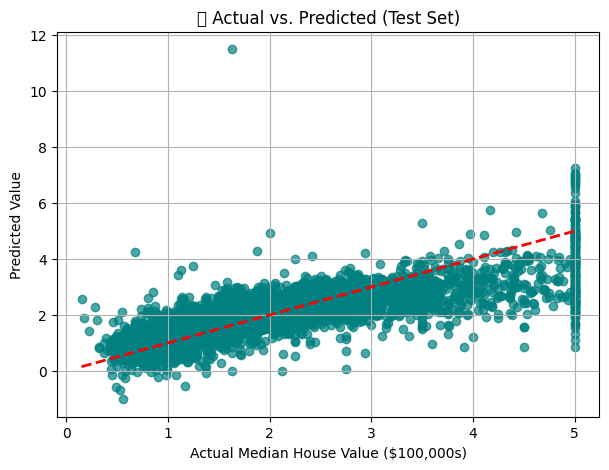

In [25]:
# Predict on test set
y_test_pred = X_test_b.dot(theta)

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Value")
plt.title("📊 Actual vs. Predicted (Test Set)")
plt.grid(True)
plt.show()
